# MACHINE LEARNING 

IMPORTING THE LIBRARIES

In [1]:
import os 
import warnings
warnings.simplefilter("ignore")

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np

In [3]:
iris=pd.read_csv('iris.csv') #reading the dataset

<IPython.core.display.Javascript object>

In [4]:
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
irisdata=iris.drop(['Id','Species'],axis=1)
irisdata


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
from sklearn.cluster import KMeans

In [7]:
wccs=[]
for k in range(1,15):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(irisdata)
    wccs.append(kmeans.inertia_)

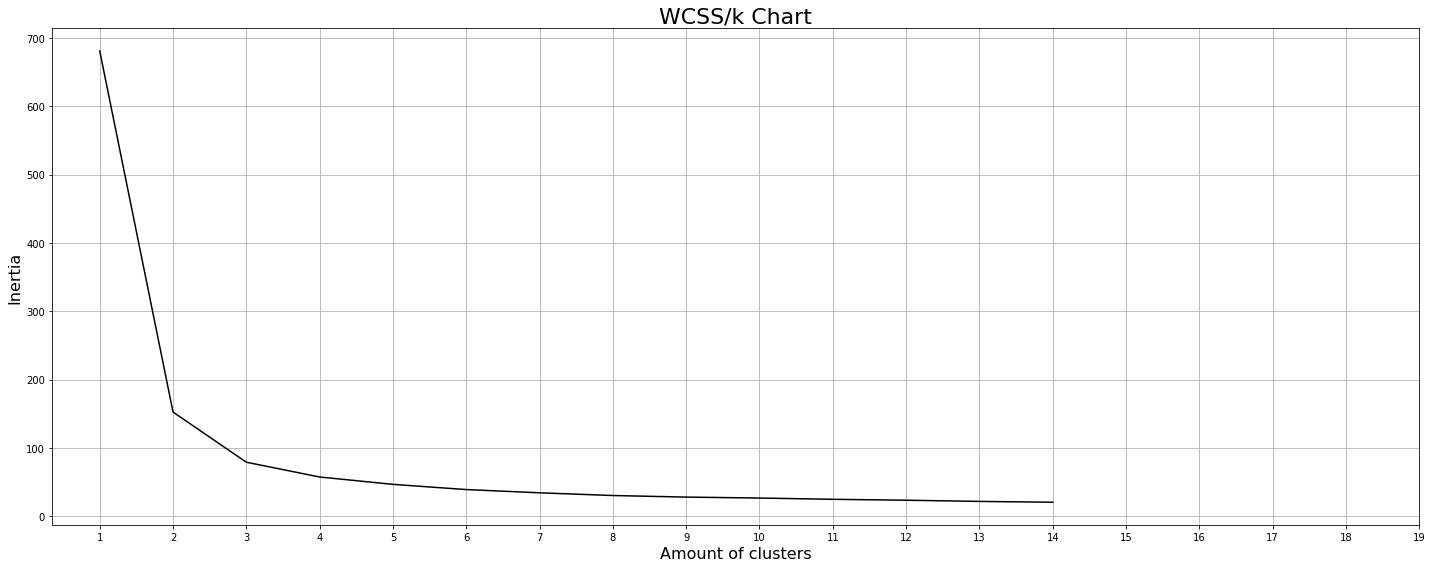

In [8]:
#plotting the Graph
plt.figure(figsize=(20,8))
plt.title("WCSS/k Chart",fontsize=22)
plt.plot(range(1,15),wccs,"-0")
plt.grid(True)
plt.xlabel("Amount of clusters",fontsize=16)
plt.ylabel("Inertia",fontsize=16)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()

In [9]:
kmeans=KMeans(n_clusters=3)
kmeans.fit(irisdata)

KMeans(n_clusters=3)

In [10]:
kmeans_predict=kmeans.predict(irisdata)
kmeans_predict

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

In [11]:
iris_data=irisdata.copy()
iris_data['Label']=kmeans_predict
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


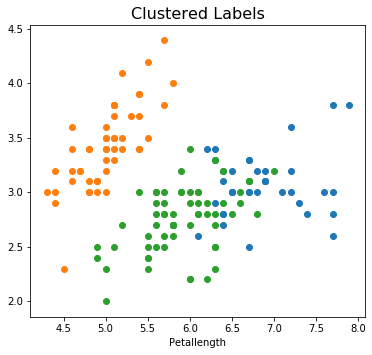

In [12]:
plt.figure(figsize=(40,6))
plt.subplot(1,5,5)
plt.title("Clustered Labels",fontsize=16)
plt.xlabel("Petallength")
plt.scatter(iris_data.SepalLengthCm[iris_data.Label == 0] , iris_data.SepalWidthCm[iris_data.Label == 0])
plt.scatter(iris_data.SepalLengthCm[iris_data.Label == 1] , iris_data.SepalWidthCm[iris_data.Label == 1])
plt.scatter(iris_data.SepalLengthCm[iris_data.Label == 2] , iris_data.SepalWidthCm[iris_data.Label == 2])
plt.subplots_adjust(top=0.8,right=0.8)
plt.show()

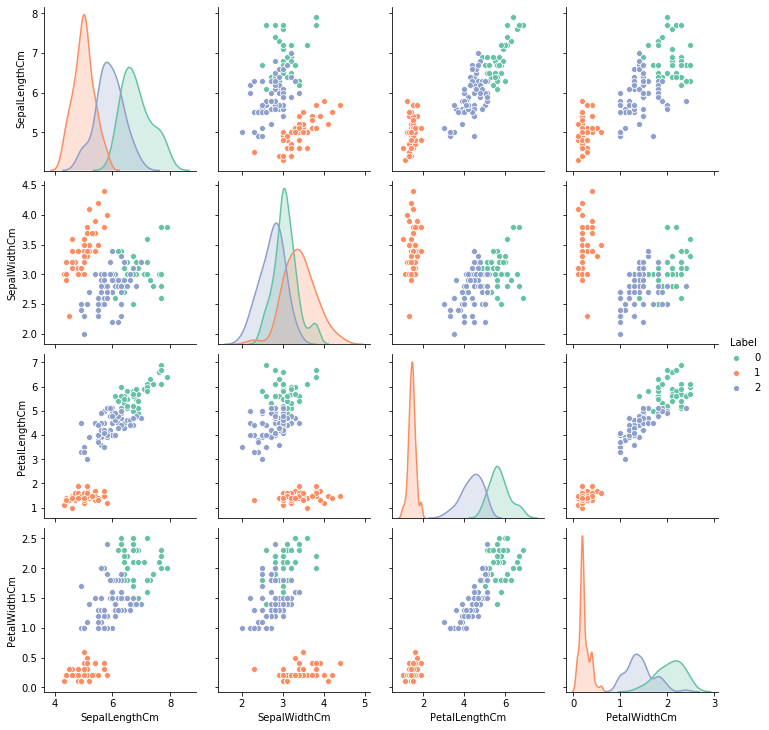

In [13]:
sns.pairplot(data=iris_data,hue="Label",palette="Set2")
plt.show()

In [14]:
from sklearn.metrics import silhouette_score


In [15]:
kmeans.score(iris_data.iloc[:,:-1])

-78.94084142614601

In [16]:
silhouette_score(iris_data,kmeans_predict)

0.6849364629960383

# # Heirachical clustering


In [17]:
import scipy.cluster.hierarchy as sch 

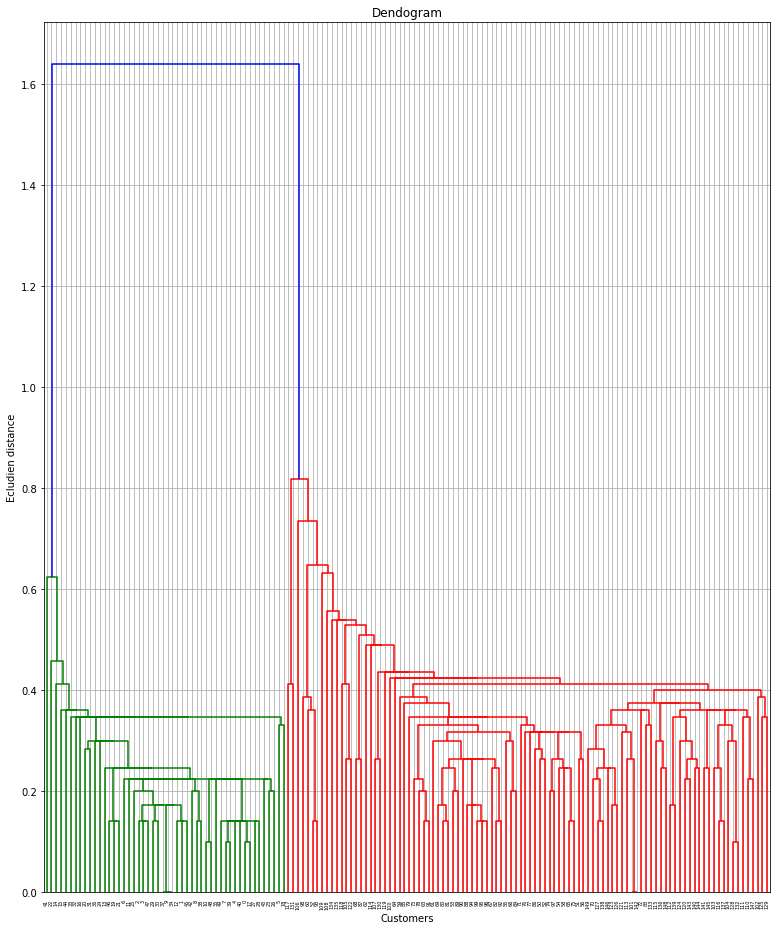

In [18]:
plt.figure(figsize=(13,16))
dendrogram=sch.dendrogram(sch.linkage(irisdata,method='single'))

plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Ecludien distance")
plt.grid()
plt.show()


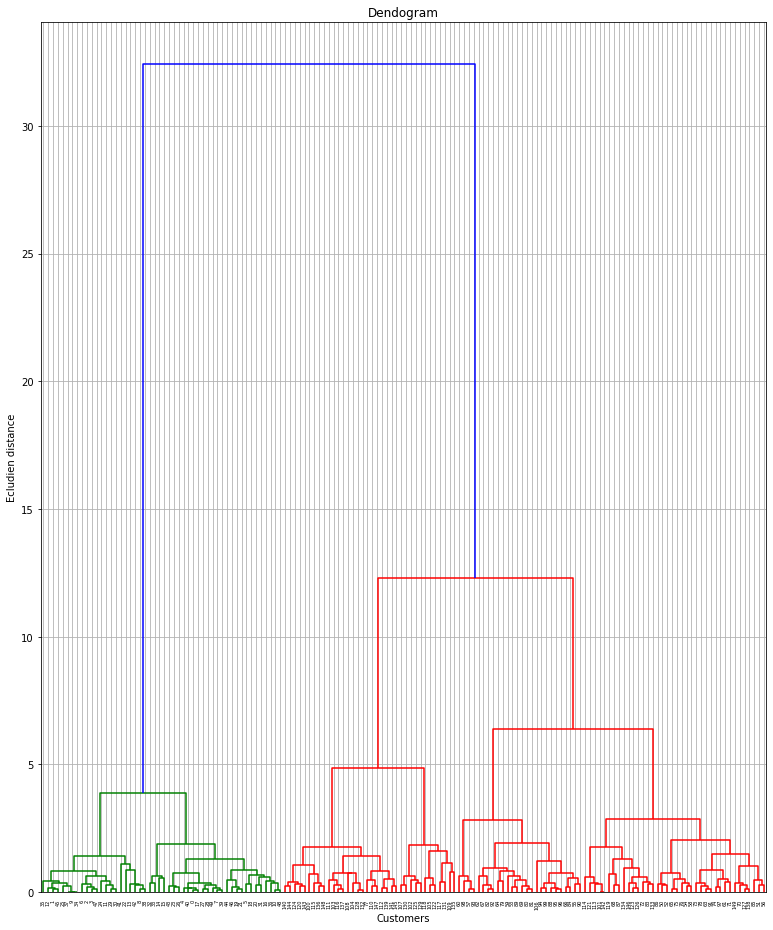

In [19]:
plt.figure(figsize=(13,16))
dendrogram=sch.dendrogram(sch.linkage(irisdata,method='ward'))

plt.title("Dendogram")
plt.xlabel("Customers")
plt.ylabel("Ecludien distance")
plt.grid()
plt.show()

In [20]:
#3 optimal Clusters

In [21]:
from  sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")
y_hc=hc.fit_predict(irisdata)

In [22]:
iris_data_h=irisdata.copy()
iris_data_h['Label']=y_hc

In [23]:
iris_data_h

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,4
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,4
148,6.2,3.4,5.4,2.3,4


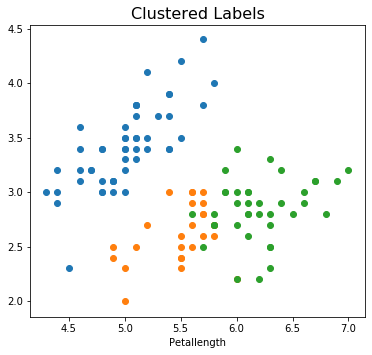

In [24]:
plt.figure(figsize=(40,6))
plt.subplot(1,5,5)
plt.title("Clustered Labels",fontsize=16)
plt.xlabel("Petallength")
plt.scatter(iris_data_h.SepalLengthCm[iris_data_h.Label == 0] , iris_data_h.SepalWidthCm[iris_data_h.Label == 0])
plt.scatter(iris_data_h.SepalLengthCm[iris_data_h.Label == 1] , iris_data_h.SepalWidthCm[iris_data_h.Label == 1])
plt.scatter(iris_data_h.SepalLengthCm[iris_data_h.Label == 2] , iris_data_h.SepalWidthCm[iris_data_h.Label == 2])
plt.subplots_adjust(top=0.8,right=0.8)
plt.show()

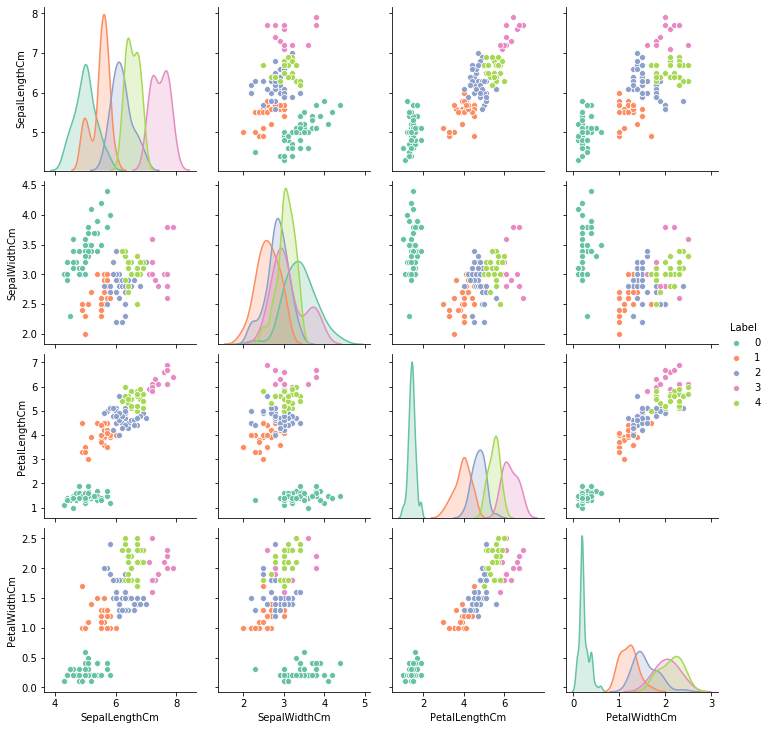

In [25]:
sns.pairplot(iris_data_h,hue="Label",palette="Set2")

# DATA PREPROCESSING

In [26]:
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


In [27]:
X=iris_data.iloc[:,:-1]
y=iris_data.iloc[:,-1]


********TEST TRAIN SPLIT**********

When you’re working on a model and want to train it, you obviously have a dataset. But after training, we have to test the model on some test dataset. For this, you’ll a dataset which is different from the training set you used earlier. But it might not always be possible to have so much data during the development phase.
In such cases, the obviously solution is to split the dataset you have into two sets, one for training and the other for testing; and you do this before you start training your model.
But the question is, how do you split the data? You can’t possibly manually split the dataset into two. And you also have to make sure you split the data in a random manner. To help us with this task, the SciKit library provides a tool, called the Model Selection library. There’s a class in the library which is, aptly, named ‘train_test_split.’ Using this we can easily split the dataset into the training and the testing datasets in various proportions.

In [28]:
from sklearn.model_selection import train_test_split
y

0      1
1      1
2      1
3      1
4      1
      ..
145    0
146    2
147    0
148    0
149    2
Name: Label, Length: 150, dtype: int32

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [30]:
X_train


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [31]:
y_test

114    2
62     2
33     1
107    0
7      1
100    0
40     1
86     2
76     2
71     2
134    0
51     2
73     2
54     2
63     2
37     1
78     2
90     2
45     1
16     1
121    2
66     2
24     1
8      1
126    2
22     1
44     1
97     2
93     2
26     1
Name: Label, dtype: int32

In [32]:
y_train

137    0
84     2
27     1
127    2
132    0
      ..
9      1
103    0
67     2
117    0
47     1
Name: Label, Length: 120, dtype: int32

# K Nearest Neighbours

In [33]:
from sklearn.neighbors import KNeighborsClassifier


In [34]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [35]:
y_predict=knn.predict(X_test)
y_predict

array([2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 1])

In [36]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [37]:
accuracy_score(y_test,y_predict)

1.0

In [38]:
confusion_matrix(y_test,y_predict)

array([[ 3,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 16]], dtype=int64)

In [39]:
knn.score(X_test,y_predict)

1.0

In [40]:
iris_data["Label"].replace({0:"Setosa",1:"versicolor",2:"Virginica"},inplace=True)

In [41]:
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,versicolor
1,4.9,3.0,1.4,0.2,versicolor
2,4.7,3.2,1.3,0.2,versicolor
3,4.6,3.1,1.5,0.2,versicolor
4,5.0,3.6,1.4,0.2,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Setosa
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Setosa
148,6.2,3.4,5.4,2.3,Setosa


# XGBoost 

In [42]:
import xgboost as xgb

In [43]:
xgb_reg=xgb.XGBClassifier()

In [44]:
xgb_reg.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [45]:
X_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
137,6.4,3.1,5.5,1.8
84,5.4,3.0,4.5,1.5
27,5.2,3.5,1.5,0.2
127,6.1,3.0,4.9,1.8
132,6.4,2.8,5.6,2.2
...,...,...,...,...
9,4.9,3.1,1.5,0.1
103,6.3,2.9,5.6,1.8
67,5.8,2.7,4.1,1.0
117,7.7,3.8,6.7,2.2


In [46]:
y_train

137    0
84     2
27     1
127    2
132    0
      ..
9      1
103    0
67     2
117    0
47     1
Name: Label, Length: 120, dtype: int32

In [47]:
xgb_reg.score(X_train,y_train)

1.0

In [48]:
xgb_reg.score(X_test,y_test)

1.0

In [49]:
y_predict=xgb_reg.predict(X_test)
y_predict

array([2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 1])

In [50]:
iris_data["Label"].replace({0:"Setosa",1:"versicolor",2:"Virginica"},inplace=True)
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,versicolor
1,4.9,3.0,1.4,0.2,versicolor
2,4.7,3.2,1.3,0.2,versicolor
3,4.6,3.1,1.5,0.2,versicolor
4,5.0,3.6,1.4,0.2,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Setosa
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Setosa
148,6.2,3.4,5.4,2.3,Setosa


#  Random Forest Classifier

In [51]:
from sklearn.ensemble import RandomForestClassifier

In [52]:
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [53]:
classifier.score(X_train,y_train)

1.0

In [54]:
classifier.score(X_test,y_test)

1.0

In [55]:
y_predict=classifier.predict(X_test)
y_predict

array([2, 2, 1, 0, 1, 0, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2,
       1, 1, 2, 1, 1, 2, 2, 1])

In [56]:
iris_data["Label"].replace({0:"Setosa",1:"versicolor",2:"Virginica"},inplace=True)
iris_data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Label
0,5.1,3.5,1.4,0.2,versicolor
1,4.9,3.0,1.4,0.2,versicolor
2,4.7,3.2,1.3,0.2,versicolor
3,4.6,3.1,1.5,0.2,versicolor
4,5.0,3.6,1.4,0.2,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Setosa
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Setosa
148,6.2,3.4,5.4,2.3,Setosa


In [58]:
xgb.__version__

'1.1.1'

In [59]:
sklearn.__version__

<IPython.core.display.Javascript object>

'0.23.1'

In [61]:
np.__version__

'1.18.1'

In [66]:
import matplotlib
matplotlib.__version__

'3.1.3'

In [67]:
sns.__version__

'0.10.1'